In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
# import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LinearRegression, Ridge, ElasticNet， LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, recall_score, f1_score

font2 = {"size":20, "weight":"normal"}

data = pd.read_csv("toxiccomments_sample_submission.csv")
features = data["id"]
label = data["prediction"]
has = HashingVectorizer()
features = has.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=0)

In [4]:
#本次改用分类模型，进行对比，观测模型的精准率，召回率，f1得分等，根据观测结果，观测采用回归模型较好
#采用支持向量机分类模型
svc = SVC()                 #Revoke the model SVC     
svc.fit(X_train, y_train)   #Fit the train dataset
y_predict = svc.predict(X_test) #Predict the result by utilizing the SVC model
print('SVC precision score：',precision_score(y_test,y_predict, average='micro'))
print('SVC Confusion Matrix：',confusion_matrix(y_test,y_predict))
print('SVC accuracy score：',accuracy_score(y_test,y_predict))
print('SVC recall score：',recall_score(y_test,y_predict,  average="micro", sample_weight=None))
print('SVC f1 score：',f1_score(y_test,y_predict, pos_label=1,average = "macro"))



E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC precision score： 0.512966493431877
SVC Confusion Matrix： [[39284     0]
 [37298     0]]
SVC accuracy score： 0.512966493431877
SVC recall score： 0.512966493431877
SVC f1 score： 0.33904682995874547


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [9]:
from sklearn.linear_model import  LogisticRegression
#采用逻辑回归分类模型
Logistic_regress = LogisticRegression(C=1e5)
Logistic_regress.fit(X_train, y_train)
# 5. 预测
y_predict = Logistic_regress.predict(X_test)
print('Logistic_regress precision score：',precision_score(y_test,y_predict, average='micro'))
print('Logistic_regress Confusion Matrix：',confusion_matrix(y_test,y_predict))
print('Logistic_regress accuracy score：',accuracy_score(y_test,y_predict))
print('Logistic_regress recall score：',recall_score(y_test,y_predict,  average="micro", sample_weight=None))
print('Logistic_regress f1 score：',f1_score(y_test,y_predict, pos_label=1,average = "macro"))

Logistic_regress precision score： 0.511921861534042
Logistic_regress Confusion Matrix： [[37934  1350]
 [36028  1270]]
Logistic_regress accuracy score： 0.511921861534042
Logistic_regress recall score： 0.511921861534042
Logistic_regress f1 score： 0.3667851097646525


In [10]:
from sklearn.ensemble import RandomForestClassifier ##
# 随机森林分类模型
RandomForest = RandomForestClassifier(n_estimators=150,min_samples_leaf=2,max_depth=6,oob_score=True)
RandomForest.fit(X_train, y_train)
y_predict = RandomForest.predict(X_test)
print('RandomForest precision score：',precision_score(y_test,y_predict, average='micro'))
print('RandomForest Confusion Matrix：',confusion_matrix(y_test,y_predict))
print('RandomForest accuracy score：',accuracy_score(y_test,y_predict))
print('RandomForest recall score：',recall_score(y_test,y_predict,  average="micro", sample_weight=None))
print('RandomForest f1 score：',f1_score(y_test,y_predict, pos_label=1,average = "macro"))

RandomForest precision score： 0.512966493431877
RandomForest Confusion Matrix： [[39284     0]
 [37298     0]]
RandomForest accuracy score： 0.512966493431877
RandomForest recall score： 0.512966493431877
RandomForest f1 score： 0.33904682995874547


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


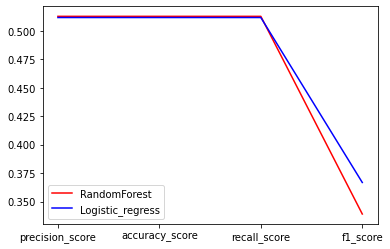

In [17]:
randomforest_predict = RandomForest.predict(X_test)
RandomForest_store = [precision_score(y_test,randomforest_predict, average='micro'),accuracy_score(y_test,randomforest_predict) ,recall_score(y_test,randomforest_predict,  average="micro", sample_weight=None)
                        ,f1_score(y_test,randomforest_predict, pos_label=1,average = "macro")     ]
x = ["precision_score", "accuracy_score", "recall_score","f1_score" ]
plt.plot(x, RandomForest_store, color = "red", label ="RandomForest" )


Logistic_regress_predict = Logistic_regress.predict(X_test)
Logistic_regress_store = [precision_score(y_test,Logistic_regress_predict, average='micro'),accuracy_score(y_test,Logistic_regress_predict) ,recall_score(y_test,Logistic_regress_predict,  average="micro", sample_weight=None)
                        ,f1_score(y_test,Logistic_regress_predict, pos_label=1,average = "macro")]
x = ["precision_score", "accuracy_score", "recall_score","f1_score" ]
plt.plot(x, Logistic_regress_store, color = "blue", label ="Logistic_regress" )



plt.legend()
plt.show()


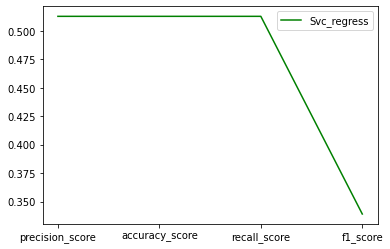

In [18]:
svc_predict = svc.predict(X_test)
svc_store = [precision_score(y_test,svc_predict, average='micro'),accuracy_score(y_test,svc_predict) ,recall_score(y_test,svc_predict,  average="micro", sample_weight=None)
                        ,f1_score(y_test,svc_predict, pos_label=1,average = "macro")]
x = ["precision_score", "accuracy_score", "recall_score","f1_score" ]
plt.plot(x, svc_store, color = "green", label ="Svc_regress" )
plt.legend()
plt.show()